In [1]:
import pandas as pd
a=pd.read_table("/home/jash/Desktop/petplan/Profitability1.txt", sep='|', lineterminator='\n', error_bad_lines=False)

Skipping line 267909: expected 33 fields, saw 34

Skipping line 299539: expected 33 fields, saw 34

/home/jash/anaconda3/envs/py27/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,17,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
data=pd.DataFrame(data=a,index=None)
data = data.sample(frac=1).reset_index(drop=True)
import math
import numpy as np
data['LossRatio'].fillna(0, inplace=True)
data['L']=0
data.loc[data['LossRatio'] >.57, 'L'] = 1

data.to_csv("/home/jash/Desktop/petplan/Profitability.csv")
Y=data['L']
y=pd.DataFrame(Y)
x=pd.DataFrame(data)

m=x.loc[x['PolicyForm']!='Introductory']
q=pd.DataFrame(m)
m2=q.loc[q['PolicyForm']!='Intro']
x=pd.DataFrame(m2)
print x['PolicyForm'].unique()

['15000' '5000' 'Gold' '10000' 'Bronze' '2500' 'Unlimited' '20000'
 'Silver' '25000']


In [42]:
x['Quadrant'].unique()

array(['LowTenure-HighLR', 'LowTenure-LowLR', 'HighTenure-LowLR',
       'HighTenure-HighLR'], dtype=object)

In [3]:
len(x)

277273

In [4]:
x = x[pd.notnull(x['BreedName'])]

In [5]:
x.isnull().sum()

LossRatio                               0
Duration                                0
PetId                                   0
StartDate                               0
EndDate                                 0
LastPolicyRef                           0
TotalClaimsAmtPaid                 115224
TotalEarnedPremium                      0
BreedName                               0
Currentage                              0
CopayPct                                0
Deductible                              0
PetType                                 0
PolicyForm                              0
CarrierCd                               0
ClaimNumber                        149260
ClaimAmount                        149260
ClaimDetails                       149260
ConditionGrp                       149260
Claimcodecategory                  149260
Severity                           149558
CustomerNumber                        334
Country                               334
PhoneNumber                       

In [6]:
x['Duration'].min()

0

In [7]:
#QUADRANT
q = x.groupby(['Quadrant']).mean()
quad=pd.DataFrame(q)
topquad=quad['LossRatio'].sort_values(ascending=False)
topquad

Quadrant
LowTenure-HighLR     8.451531
HighTenure-HighLR    3.970562
HighTenure-LowLR     0.085238
LowTenure-LowLR      0.010214
Name: LossRatio, dtype: float64

In [8]:
x['Dseg']=0

In [9]:
x.loc[x['Duration'] <100, 'Dseg'] = 1
x.loc[(x['Duration']>=100) & (x['Duration'] <200),'Dseg']=2
x.loc[(x['Duration']>=200) & (x['Duration'] <300),'Dseg']=3
x.loc[(x['Duration']>=300) & (x['Duration'] <400),'Dseg']=4
x.loc[(x['Duration']>=400) & (x['Duration'] <500),'Dseg']=5
x.loc[(x['Duration']>=500) & (x['Duration'] <600),'Dseg']=6
x.loc[(x['Duration']>=600) & (x['Duration'] <700),'Dseg']=7
x.loc[(x['Duration']>=700) & (x['Duration'] <800),'Dseg']=8
x.loc[(x['Duration']>=800) & (x['Duration'] <900),'Dseg']=9
x.loc[(x['Duration']>=900) ,'Dseg']=10

In [10]:
#OVERALL
x['Dseg'].unique()

array([ 4,  1,  6,  2, 10,  3,  8,  5,  7,  9])

In [11]:
#DURATION
dur = x.groupby(['Dseg']).mean()
dse=pd.DataFrame(dur)
dse.head()
import matplotlib.pyplot as plt
fig = plt.figure("LossRatio vs DurationBucket",figsize=(16,8))

plt.plot(dse.index,dse['LossRatio'])

In [12]:
x.loc[x['LossRatio']>=x['LossRatio'].max()-400]['Duration'].mean()

46.70909090909091

In [13]:
len(x.loc[x['LossRatio']>=x['LossRatio'].max()-500])

1201

In [14]:
len(x.loc[x['Duration'] <100])

36680

In [15]:
x['Duration'].mean()

601.0434338807354

In [16]:
topdse=dse['LossRatio'].sort_values(ascending=False)
print topdse


Dseg
6     2.305130
7     2.255089
10    2.181810
8     2.007477
9     1.965109
5     1.774716
3     1.395080
4     1.391344
2     1.079083
1     0.843439
Name: LossRatio, dtype: float64


In [17]:
#BREEDS
df_agg = x.groupby(['BreedName']).mean()
breed=pd.DataFrame(df_agg)
breed.head()
topbreeds=breed['LossRatio'].sort_values(ascending=False)
topbreeds.head(20)


BreedName
Belgian Shepherd Laekenois       125.652078
Hungarian Vizsla                  18.578355
Bergamasco                        12.483211
Welsh Springer Spaniel            10.698056
Mexican Hairless Crested           9.630875
Australian Kelpie                  8.386192
Ori Pei                            7.946571
Peterbald                          7.677554
Ocicat                             6.065461
Belgian Shepherd Tervuren          6.063968
Spinone italiano                   5.864304
Havana Brown                       5.272087
American Shorthair (purebred)      4.888956
Abyssinian                         4.643358
Shar-pei Mix                       4.427271
Argentine Dogo                     4.425663
Alapaha Blue Blood Bulldog         4.276661
Pekingese                          4.210040
Lagotto Romagnolo                  4.036106
Doberman Pinscher Mix              4.023289
Name: LossRatio, dtype: float64

In [31]:
#CURRENTAGE
age = x.groupby(['Currentage']).mean()
ag=pd.DataFrame(age)
ag.head()
topcurrentage=ag['LossRatio'].sort_values(ascending=False)
topcurrentage.head(10)

Currentage
18.0    4.569484
16.0    3.485691
12.0    2.642291
13.0    2.417943
8.0     2.366490
15.0    2.344461
10.0    2.251987
11.0    2.057830
5.0     2.043176
17.0    2.004397
Name: LossRatio, dtype: float64

Index([u'LossRatio', u'Duration', u'TotalClaimsAmtPaid', u'TotalEarnedPremium',
       u'CopayPct', u'Deductible', u'ClaimNumber', u'ClaimAmount',
       u'CustomerNumber', u'claimdurationInception', u'churn\r', u'L',
       u'Dseg'],
      dtype='object')


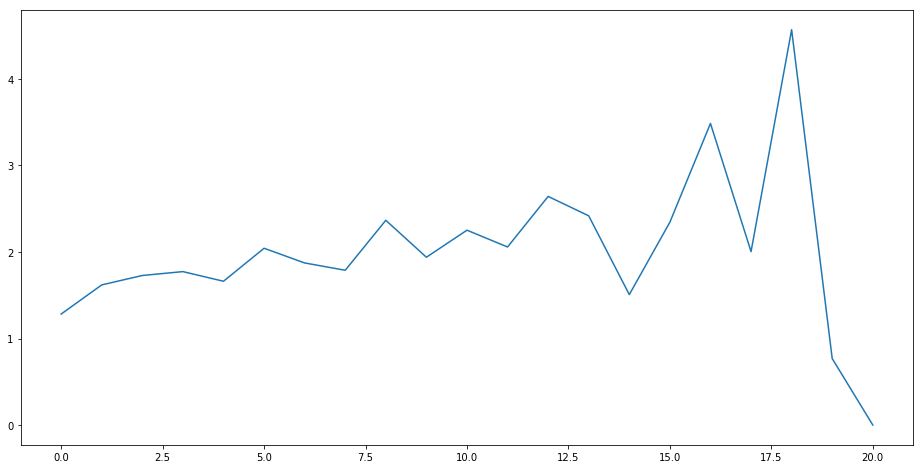

In [41]:
import matplotlib.pyplot as plt
fig = plt.figure("LossRatio vs Currentage",figsize=(16,8))
print age.columns
plt.plot(ag.index,ag['LossRatio'])

In [19]:
#POLICYFORM
p = x.groupby(['PolicyForm']).mean()
pf=pd.DataFrame(p)
toppf=pf['LossRatio'].sort_values(ascending=False)
toppf

PolicyForm
25000        2.985784
Gold         2.368515
Unlimited    2.337165
Silver       2.016216
10000        1.886515
20000        1.724543
Bronze       1.675097
15000        1.568882
2500         0.909969
5000         0.716967
Name: LossRatio, dtype: float64

In [20]:
#CHURN
c = x.groupby(['churn\r']).mean()
ch=pd.DataFrame(c)
churn=ch['LossRatio'].sort_values(ascending=False)
churn

churn\r
0    1.739911
1    1.694695
Name: LossRatio, dtype: float64

In [21]:
#DEDUCTIBLE
d=x.groupby(['Deductible']).mean()
ded=pd.DataFrame(d)
ded.head()
topded=ded['LossRatio'].sort_values(ascending=False)
topded.head(10)


Deductible
700    3.567858
150    2.356685
200    2.133599
100    2.108878
350    1.911898
450    1.782146
400    1.623339
250    1.619697
500    1.610637
750    1.573437
Name: LossRatio, dtype: float64